In [2]:
# STEP 1 — DATASET SELECTION
# Upload CSV file from your computer

from google.colab import files
import pandas as pd

print("📂 Please upload your dataset CSV file...")

uploaded = files.upload()   # This opens the upload dialog

# Extract filename automatically
filename = list(uploaded.keys())[0]

# Load the dataset into pandas
df = pd.read_csv(filename)

print("✅ File uploaded successfully!")
print("📏 Dataset Shape:", df.shape)
print("🧐 Preview of dataset:")
df.head()


📂 Please upload your dataset CSV file...


Saving faults.csv to faults.csv
✅ File uploaded successfully!
📏 Dataset Shape: (1941, 34)
🧐 Preview of dataset:


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [3]:
# STEP 2 — DATA PREPROCESSING
import numpy as np

print("🔧 Starting preprocessing...")

# -----------------------------
# 1️⃣ Remove duplicates
# -----------------------------
df = df.drop_duplicates()
print("✔ Removed duplicates. New shape:", df.shape)

# -----------------------------
# 2️⃣ Check missing values
# -----------------------------
print("\n🔍 Missing values per column:")
print(df.isnull().sum())

# If there are missing values, fill them (none expected in this dataset)
df = df.fillna(0)

# -----------------------------
# 3️⃣ Convert data types (Just ensuring everything except targets is float)
# -----------------------------
df = df.apply(pd.to_numeric, errors="ignore")

print("\n✔ Converted datatypes where possible.")

# -----------------------------
# 4️⃣ Identify feature columns and target columns
# -----------------------------
target_columns = [
    'Pastry','Z_Scratch','K_Scatch','Stains',
    'Dirtiness','Bumps','Other_Faults'
]

feature_columns = [col for col in df.columns if col not in target_columns]

print("\n📌 Number of Features:", len(feature_columns))
print("📌 Number of Targets:", len(target_columns))

# -----------------------------
# 5️⃣ Scale ONLY numerical feature columns
# -----------------------------
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df[feature_columns]
y = df[target_columns]

# Fit-transform ONLY X
X_scaled = scaler.fit_transform(X)

print("\n✨ Preprocessing complete. Features scaled, targets untouched.")


🔧 Starting preprocessing...
✔ Removed duplicates. New shape: (1941, 34)

🔍 Missing values per column:
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_F

/tmp/ipython-input-88436492.py:24: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")



✨ Preprocessing complete. Features scaled, targets untouched.


In [4]:
# STEP 3 — FEATURE & TARGET SEPARATION

print("🪄 Separating features and target columns...")

# X = independent variables (features)
X = df[feature_columns]

# y = dependent variables (7 fault label columns)
y = df[target_columns]

print("✔ Feature matrix X shape:", X.shape)
print("✔ Target matrix y shape:", y.shape)

print("\n🎯 Feature & target separation done successfully!")


🪄 Separating features and target columns...
✔ Feature matrix X shape: (1941, 27)
✔ Target matrix y shape: (1941, 7)

🎯 Feature & target separation done successfully!


In [5]:
# STEP 4 — TRAIN/TEST SPLIT

from sklearn.model_selection import train_test_split

print("✂️ Splitting the data into train and test sets...")

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,     # keeps results consistent
    shuffle=True
)

print("✔ Training feature shape:", X_train.shape)
print("✔ Testing feature shape:", X_test.shape)
print("✔ Training target shape:", y_train.shape)
print("✔ Testing target shape:", y_test.shape)

print("\n🎉 Train–Test Split completed successfully!")


✂️ Splitting the data into train and test sets...
✔ Training feature shape: (1552, 27)
✔ Testing feature shape: (389, 27)
✔ Training target shape: (1552, 7)
✔ Testing target shape: (389, 7)

🎉 Train–Test Split completed successfully!


In [6]:
# STEP 5 — MODEL SELECTION & TRAINING (Random Forest)

from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

print("🌲 Initializing Random Forest model for multi-label classification...")

# Wrap RandomForest inside MultiOutputClassifier
rf_model = MultiOutputClassifier(
    RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    )
)

print("⚡ Training the Random Forest model... this will be quick.")

rf_model.fit(X_train, y_train)

print("🎉 Random Forest training completed successfully!")


🌲 Initializing Random Forest model for multi-label classification...
⚡ Training the Random Forest model... this will be quick.
🎉 Random Forest training completed successfully!


In [7]:
# STEP 6 — MODEL PREDICTION & EVALUATION

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

print("🔮 Making predictions on the test set...")
y_pred = rf_model.predict(X_test)

print("📊 Evaluating model performance...\n")

# 🔥 Accuracy per fault class
for i, col in enumerate(target_columns):
    acc = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"Accuracy for {col}: {acc:.4f}")

print("\n✨ Macro F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("✨ Micro F1 Score:", f1_score(y_test, y_pred, average='micro'))

print("\n📌 Macro Precision:", precision_score(y_test, y_pred, average='macro'))
print("📌 Micro Precision:", precision_score(y_test, y_pred, average='micro'))

print("\n🎯 Macro Recall:", recall_score(y_test, y_pred, average='macro'))
print("🎯 Micro Recall:", recall_score(y_test, y_pred, average='micro'))

print("\n📜 Full Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_columns))


🔮 Making predictions on the test set...
📊 Evaluating model performance...

Accuracy for Pastry: 0.9486
Accuracy for Z_Scratch: 0.9820
Accuracy for K_Scatch: 0.9820
Accuracy for Stains: 0.9974
Accuracy for Dirtiness: 0.9897
Accuracy for Bumps: 0.8586
Accuracy for Other_Faults: 0.8072

✨ Macro F1 Score: 0.7676059112067939
✨ Micro F1 Score: 0.757532281205165

📌 Macro Precision: 0.8549490865528602
📌 Micro Precision: 0.8571428571428571

🎯 Macro Recall: 0.7087002042669963
🎯 Micro Recall: 0.6786632390745502

📜 Full Classification Report:
              precision    recall  f1-score   support

      Pastry       0.80      0.41      0.55        29
   Z_Scratch       0.97      0.85      0.91        41
    K_Scatch       0.97      0.94      0.96        83
      Stains       1.00      0.92      0.96        13
   Dirtiness       0.75      0.75      0.75         8
       Bumps       0.67      0.47      0.55        72
Other_Faults       0.82      0.61      0.70       143

   micro avg       0.86      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


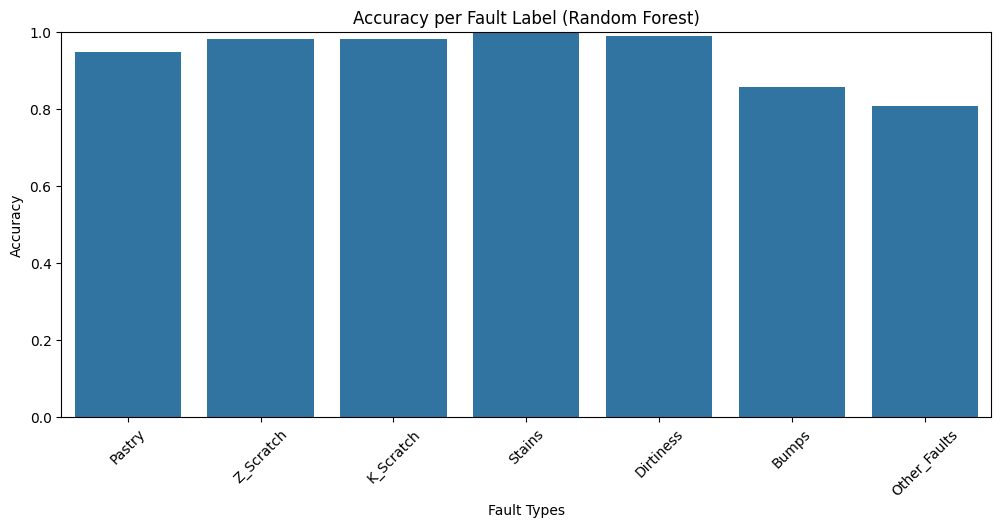

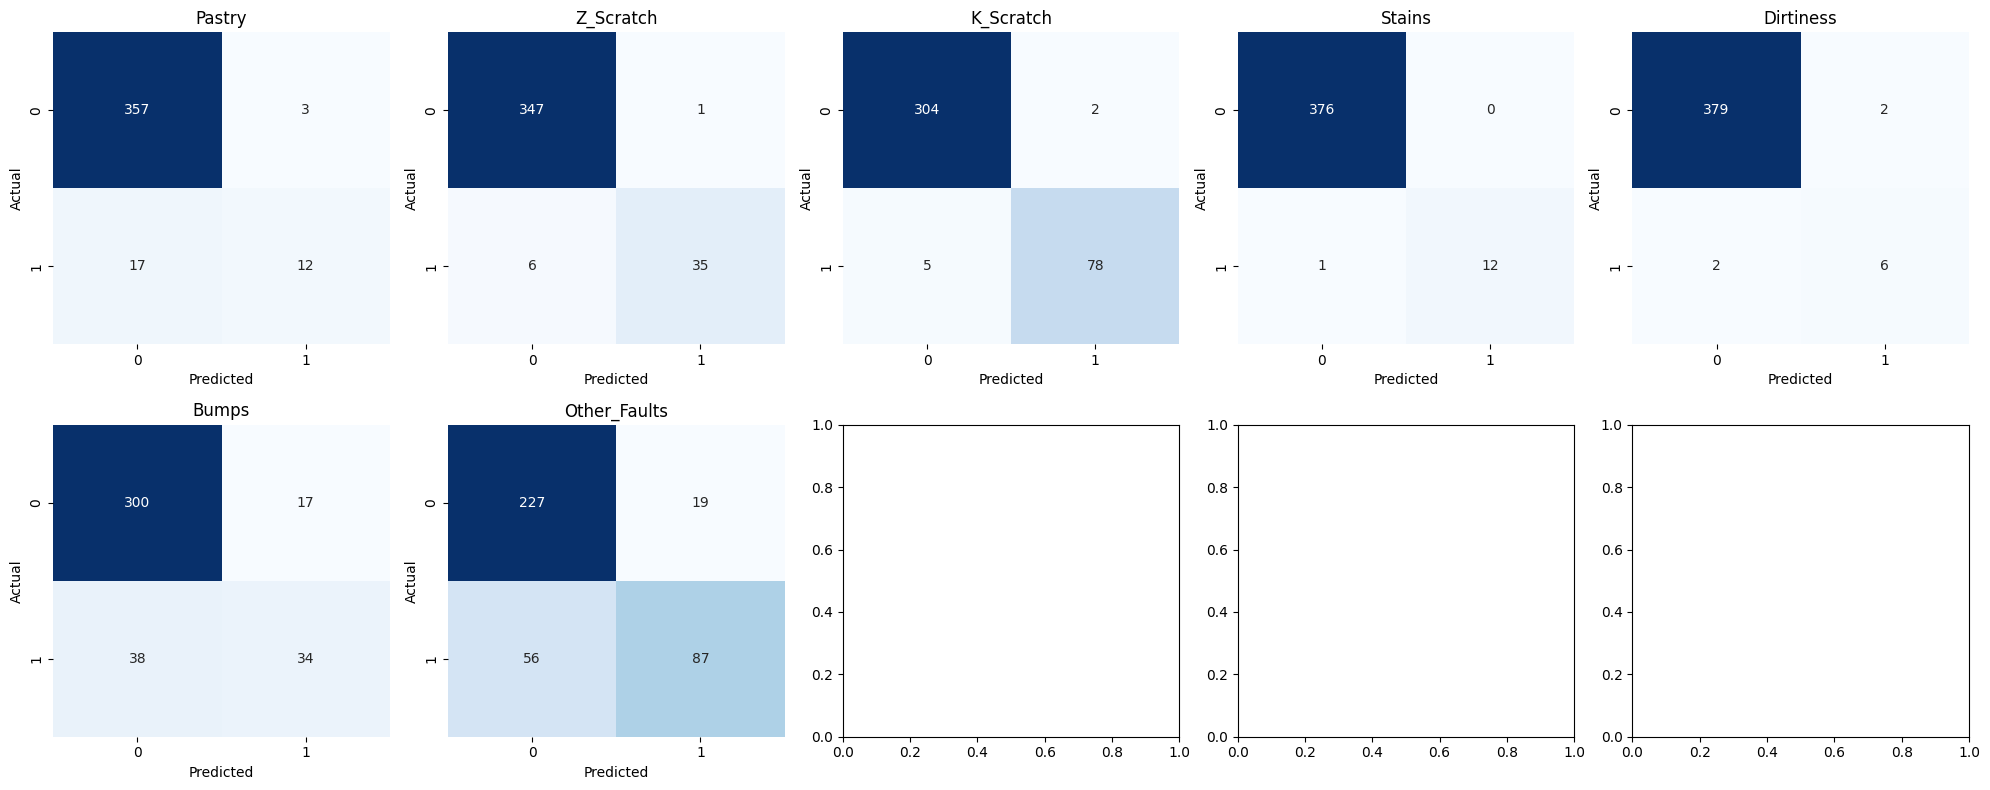


📌 Classification Report for ALL Fault Labels


======= Pastry =======
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       360
           1       0.80      0.41      0.55        29

    accuracy                           0.95       389
   macro avg       0.88      0.70      0.76       389
weighted avg       0.94      0.95      0.94       389


======= Z_Scratch =======
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       348
           1       0.97      0.85      0.91        41

    accuracy                           0.98       389
   macro avg       0.98      0.93      0.95       389
weighted avg       0.98      0.98      0.98       389


======= K_Scratch =======
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       306
           1       0.97      0.94      0.96        83

    accuracy                           0.98       389
   

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix

# 1. Recreate/define your target column list
target_cols = ['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness',
               'Bumps', 'Other_Faults']

# 2. Get per-label accuracy
accuracies = []
for i, col in enumerate(target_cols):
    acc = accuracy_score(y_test.iloc[:, i], rf_pred[:, i])
    accuracies.append(acc)

# 3. Plot accuracies
plt.figure(figsize=(12, 5))
sns.barplot(x=target_cols, y=accuracies)
plt.ylim(0, 1)
plt.title("Accuracy per Fault Label (Random Forest)")
plt.ylabel("Accuracy")
plt.xlabel("Fault Types")
plt.xticks(rotation=45)
plt.show()

# 4. Multi-label confusion matrices
conf_matrices = multilabel_confusion_matrix(y_test, rf_pred)

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, (matrix, ax) in enumerate(zip(conf_matrices, axes)):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(target_cols[i])
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

# 5. Full classification report
print("\n📌 Classification Report for ALL Fault Labels\n")
for i, col in enumerate(target_cols):
    print(f"\n======= {col} =======")
    print(classification_report(y_test.iloc[:, i], rf_pred[:, i]))
